In [259]:
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import numpy as np
import math as math
import calendar
import pytz
import datetime
import json
import xarray as xr
import pandas as pd
import os
import statistics 

import array
import matplotlib.patches as pch

In [189]:
Username= 'OOIAPI-GYA3G8JFTQFO4I'
Token= 'TEMP-TOKEN-ADO5UM3SL0ARO0'

In [238]:
r_1 = requests.get('https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_hourly?beginDT=2019-01-01T08:00:01.000Z&endDT=2020-01-01T08:00:01.000Z&limit=1000', auth=(Username, Token))
data_1 = r_1.json()
print('Still Working')
r_2= requests.get('https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_hourly?beginDT=2019-01-01T08:00:01.000Z&endDT=2020-01-01T08:00:01.000Z&limit=1000', auth=(Username, Token))
data_2 = r_2.json()

Still Working


In [239]:
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

In [240]:
time_1 = []
rainRate_1 = []
windSpeed_1 = []
time_2 = []
rainRate_2 = []
windSpeed_2 = []

for i in range(len(data_1)-1):
    time_1.append(ntp_seconds_to_datetime(data_1[i]['pk']['time']))
    rainRate_1.append(data_1[i]['met_rainrte'])
    windSpeed_1.append(data_1[i]["metbk_a_dcl_instrument-met_relwind_speed"])

for i in range(len(data_2)):
    time_2.append(ntp_seconds_to_datetime(data_2[i]['pk']['time']))
    rainRate_2.append(data_2[i]['met_rainrte'])
    windSpeed_2.append(data_2[i]["metbk_a_dcl_instrument-met_relwind_speed"])

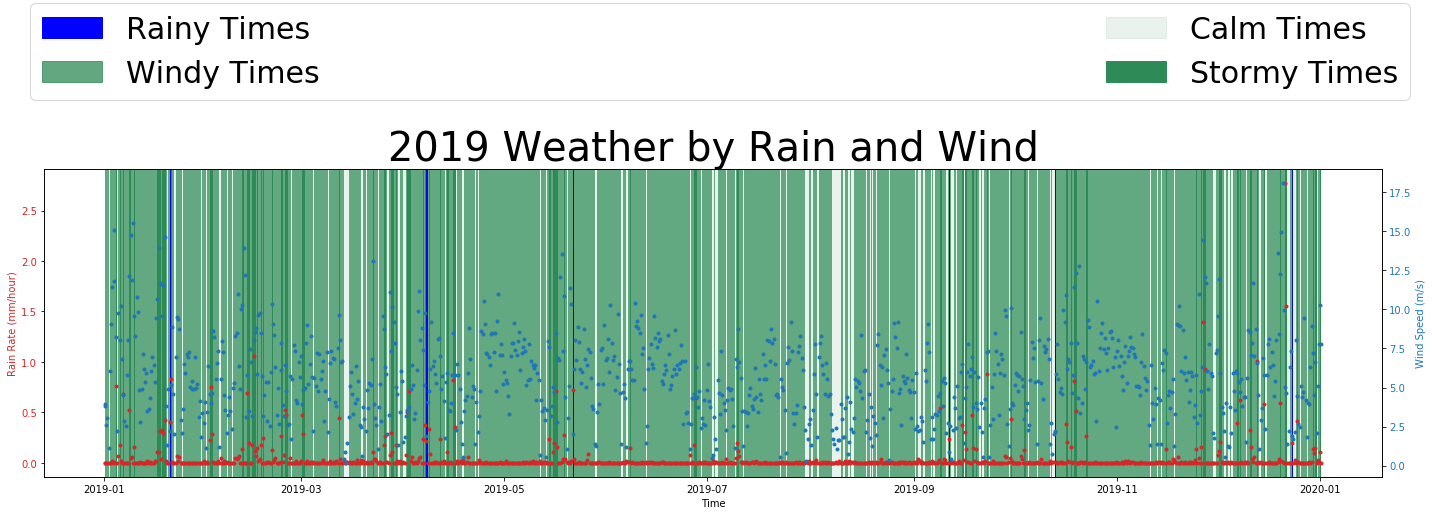

Rain and Wind:  94
Rain:  6
Wind:  784
None:  116


In [273]:
rainwind = 0
rain = 0
wind= 0
NA = 0

fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(20)

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Rain Rate (mm/hour)', color=color)
ax1.plot(time_1, rainRate_1,'.',  color=color)
ax1.tick_params(axis='y', labelcolor=color)

for i in range(0, len(windSpeed_1)):
    if i!=len(windSpeed_1)-1:
        if(rainRate_1[i]>0.1 and windSpeed_1[i]>= 2.5):
            #print('rian and wind')
            rainwind+=1
            plt.axvspan(time_1[i],time_1[i+1], facecolor='seagreen',alpha=1)
        elif(rainRate_1[i]>0.1):
        #print('rain')
            rain+=1
            plt.axvspan(time_1[i],time_1[i+1], facecolor= 'blue')
        elif(windSpeed_1[i]>= 2.5):
            #print('wind')
            wind+=1
            plt.axvspan(time_1[i],time_1[i+1], facecolor='seagreen',alpha=.75)
        else:
            #print('NA')
            NA+=1
            plt.axvspan(time_1[i],time_1[i+1], facecolor='seagreen',alpha=.1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Wind Speed (m/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(time_1, windSpeed_1,'.', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

rain_patch = pch.Patch(color='blue', label='Rainy Times')
wind_patch = pch.Patch(color='seagreen',alpha=.75, label='Windy Times')
calm_patch = pch.Patch(color='seagreen',alpha=.1, label='Calm Times')
storm_patch = pch.Patch(color='seagreen',alpha=1, label='Stormy Times')

fig.legend(handles = [rain_patch,wind_patch,calm_patch,storm_patch], prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=1.)

plt.title('2019 Weather by Rain and Wind', fontsize = 40)
plt.show()

print('Rain and Wind: ',rainwind)
print('Rain: ',rain)
print('Wind: ',wind)
print('None: ',NA)  

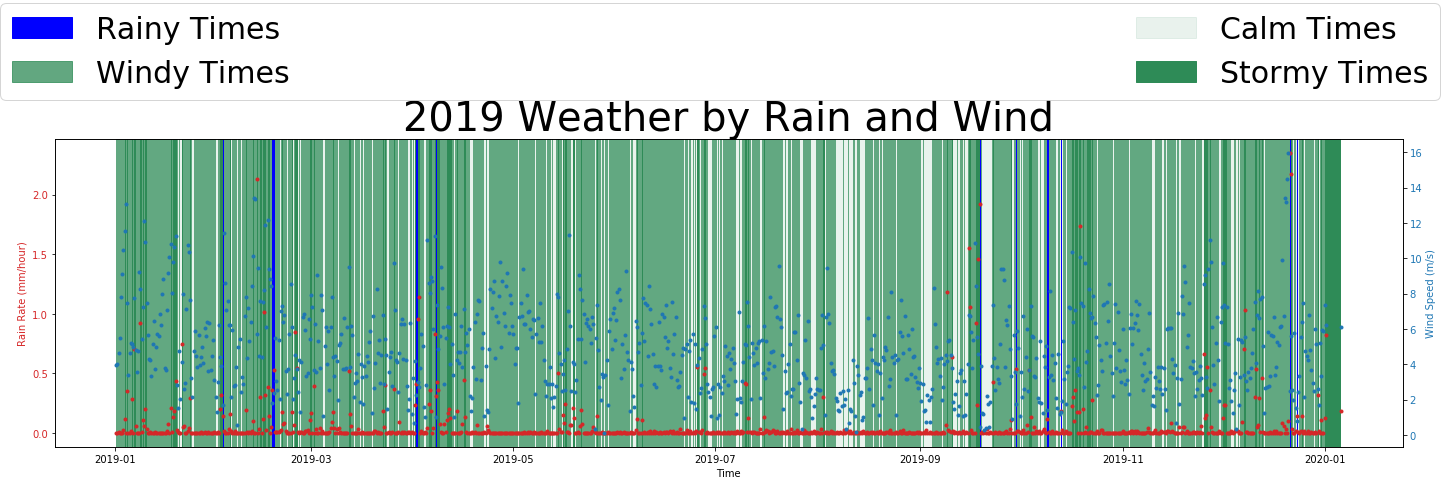

Rain and Wind:  110
Rain:  11
Wind:  717
None:  162


In [264]:
rainwind = 0
rain = 0
wind= 0
NA = 0

fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(20)

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Rain Rate (mm/hour)', color=color)
ax1.plot(time_2, rainRate_2,'.',  color=color)
ax1.tick_params(axis='y', labelcolor=color)

for i in range(0, len(windSpeed_2)):
    if i!=len(windSpeed_2)-1:
        if(rainRate_2[i]>0.1 and windSpeed_2[i]>= 2.5):
            #print('rian and wind')
            rainwind+=1
            plt.axvspan(time_2[i],time_2[i+1], facecolor='seagreen',alpha=1)
        elif(rainRate_2[i]>0.1):
        #print('rain')
            rain+=1
            plt.axvspan(time_2[i],time_2[i+1], facecolor='blue')
        elif(windSpeed_2[i]>= 2.5):
            #print('wind')
            wind+=1
            plt.axvspan(time_2[i],time_2[i+1], facecolor='seagreen',alpha=.75)
        else:
            #print('NA')
            NA+=1
            plt.axvspan(time_2[i],time_2[i+1], facecolor='seagreen',alpha=.1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Wind Speed (m/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(time_2, windSpeed_2,'.', color=color)
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped

rain_patch = pch.Patch(color='blue', label='Rainy Times')
wind_patch = pch.Patch(color='seagreen',alpha=.75, label='Windy Times')
calm_patch = pch.Patch(color='seagreen',alpha=.1, label='Calm Times')
storm_patch = pch.Patch(color='seagreen',alpha=1, label='Stormy Times')

fig.legend(handles = [rain_patch,wind_patch,calm_patch,storm_patch], prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=1.)
plt.title('2019 Weather by Rain and Wind', fontsize = 40)

plt.show()

print('Rain and Wind: ',rainwind)
print('Rain: ',rain)
print('Wind: ',wind)
print('None: ',NA)  

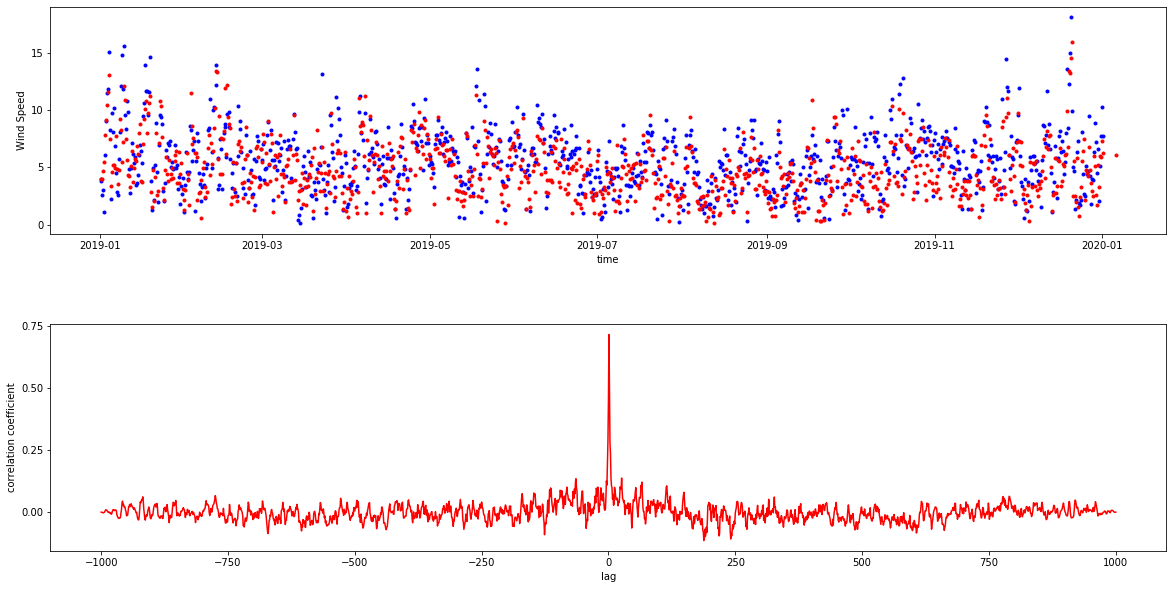

In [243]:
fig, (ax0, ax1) = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(20)

fig.subplots_adjust(hspace=0.4)
ax0.plot(time_1, windSpeed_1, '.b', time_2, windSpeed_2, '.r')
ax0.set_xlabel('time')
ax0.set_ylabel('Wind Speed')

t1=np.asarray(time_1)
t2=np.asarray(time_2)

y1=np.asarray(windSpeed_1)
y2=np.asarray(windSpeed_2)


lags = np.arange(-len(t1) + 1, len(t1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())


ax1.plot(lags, ccor, 'r')
ax1.set_xlabel('lag')
ax1.set_ylabel('correlation coefficient')

for ax in (ax0, ax1):
    ax.locator_params(axis='y', nbins=4)

0.6344978847923601


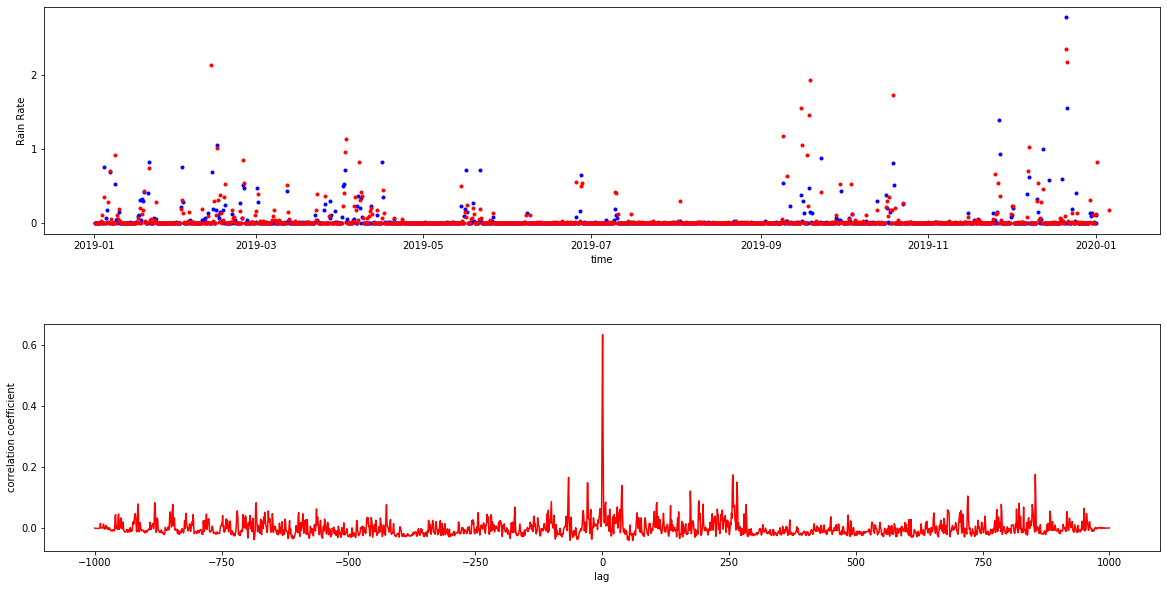

In [244]:
fig, (ax0, ax1) = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(20)

fig.subplots_adjust(hspace=0.4)
ax0.plot(time_1, rainRate_1, '.b', time_2, rainRate_2, '.r')
ax0.set_xlabel('time')
ax0.set_ylabel('Rain Rate')

t1=np.asarray(time_1)
t2=np.asarray(time_2)

y1=np.asarray(rainRate_1)
y2=np.asarray(rainRate_2)

lags = np.arange(-len(t1) + 1, len(t1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())


ax1.plot(lags, ccor, 'r')
ax1.set_xlabel('lag')
ax1.set_ylabel('correlation coefficient')

print(ccor.max())

for ax in (ax0, ax1):
    ax.locator_params(axis='y', nbins=4)

In [245]:
npts = 500
x = np.linspace(0, 50, npts)
y1 = 5 * np.sin(x/2) + np.random.randn(npts)
y2 = 5 * np.cos(x/2) + np.random.randn(npts)

y1=np.asarray(rainRate_1)
y2=np.asarray(rainRate_2)


lags = np.arange(-time_1 + 1, time_1)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(x, y1, 'b', label='y1')
ax.plot(x, y2, 'r', label='y2')
ax.set_ylim(-10, 10)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

TypeError: bad operand type for unary -: 'list'

In [246]:
time_1[0].month

1

In [247]:
rain_1_Month= []
wind_1_Month= []
rain_2_Month= []
wind_2_Month= []

rain_1= []
wind_1= []
rain_2= []
wind_2= []

for i in range(1,13):
    rain_1_Month.append([0,0])
    wind_1_Month.append([0,0])
    rain_2_Month.append([0,0])
    wind_2_Month.append([0,0])

    
for i in range(0,len(time_1)):
    
    rain_1_Month[time_1[i].month-1][0]+=1
    wind_1_Month[time_1[i].month-1][0]+=1
    rain_2_Month[time_2[i].month-1][0]+=1
    wind_2_Month[time_2[i].month-1][0]+=1
    
    rain_1_Month[time_1[i].month-1][1]+=rainRate_1[i]
    wind_1_Month[time_1[i].month-1][1]+=windSpeed_2[i]
    rain_2_Month[time_2[i].month-1][1]+=rainRate_1[i]
    wind_2_Month[time_2[i].month-1][1]+=windSpeed_2[i]

for i in range(0,12):
    rain_1.append(rain_1_Month[i][1]*1000/rain_1_Month[i][0])
    wind_1.append(wind_1_Month[i][1]/wind_1_Month[i][0])

    rain_2.append(rain_2_Month[i][1]*1000/rain_2_Month[i][0])
    wind_2.append(wind_2_Month[i][1]/wind_2_Month[i][0])
    
    rain_1[i]=rain_1[i]/1000
    rain_2[i]=rain_2[i]/1000

In [250]:
def monthavg(time,parm):
    # Intakes the time and parameter to be averaged
    monthtracker = []
    
    m = 0 # Month Index
    i = 0 # Total data Index
    c = 0 # Counting Indix for data set within the month to calculate the average.
    parsum = 0 # Variable to hold the summation of parameter values within the month.
    
    while m < 12:
        
        while time[i].month == m+1:
            parsum += parm[i]
            i += 1
            c += 1
        
        monthtracker.append(parsum/c)
        c = 0
        parsum = 0
        m += 1
    
    return monthtracker

NameError: name 'pch' is not defined

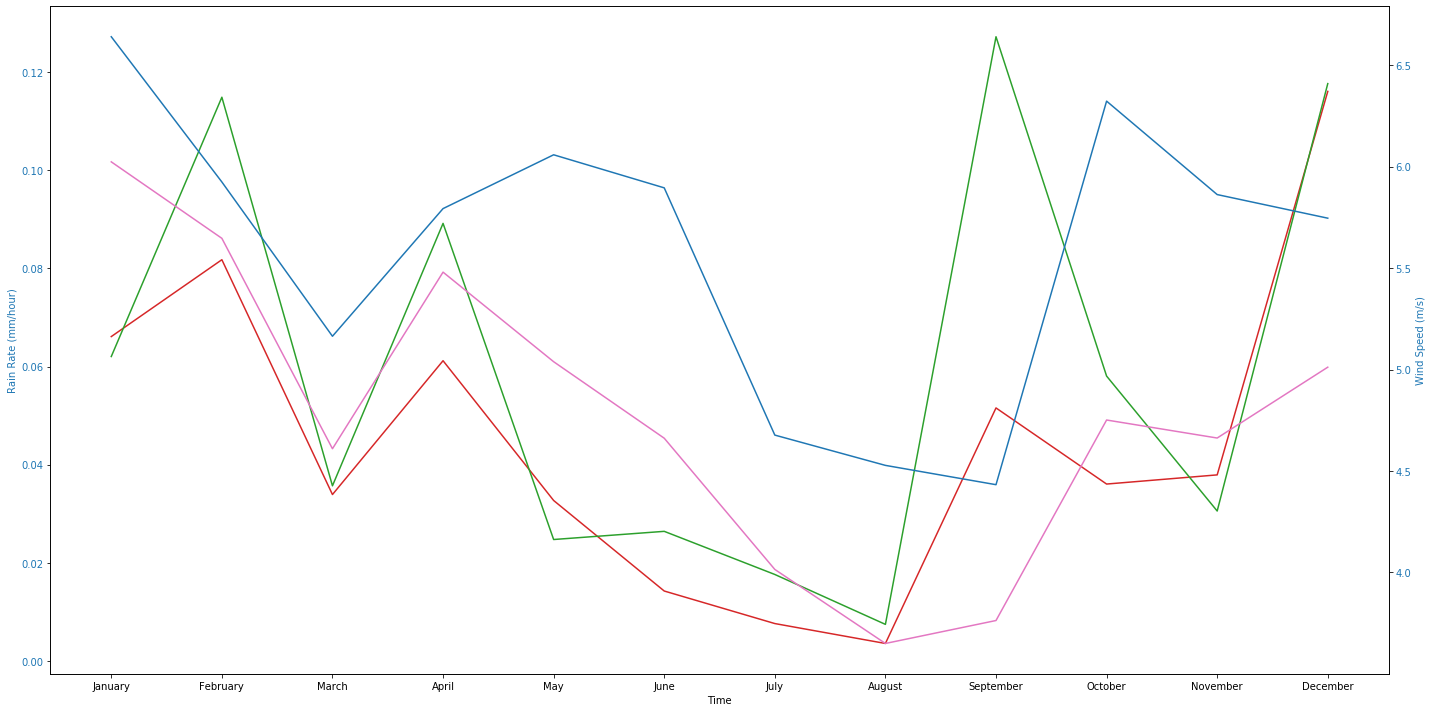

In [257]:
rain_1=monthavg(time_1,rainRate_1)
rain_2=monthavg(time_2,rainRate_2)
wind_1=monthavg(time_1,windSpeed_1)
wind_2=monthavg(time_2,windSpeed_2)


months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December']

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
color1 = 'tab:red'
color2 = 'tab:green'
ax1.set_xlabel('Time')
ax1.set_ylabel('Rain Rate (mm/hour)', color=color)
ax1.plot(months, rain_1,  color=color1)
ax1.plot(months, rain_2,  color=color2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color3 = 'tab:blue'
color4 = 'tab:pink'
ax2.set_ylabel('Wind Speed (m/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(months, wind_1, color=color3)
ax2.plot(months, wind_2, color=color4)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




In [155]:
print(max(rain_1))
print(max(rain_2))
print(max(wind_1))
print(max(wind_2))

0.1277795816740776
0.12511003120637038
7.005063322760451
7.0590279865531205
